In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


loan_df = pd.read_csv("../Data/Loan_Default.csv")

In [3]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [4]:
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           148670 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [5]:
from sklearn.model_selection import train_test_split

features = [
    "loan_amount", 
    "income", 
    "Gender",
    "rate_of_interest",
    "age",
    "lump_sum_payment",
    "credit_type",
    "total_units",
    "Credit_Worthiness",
    "Credit_Score",
    "approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
lr.score(X_test, y_test)

0.8570323535346741

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.8570323535346741

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_test, lr.predict(X_test))

array([[22338,     7],
       [ 4244,  3145]], dtype=int64)

In [10]:
import numpy as np

actual_y = np.array([0, 1, 0, 1, 0, 1, 0, 0 , 1, 1, 1, 1, 0, 0 , 1, 1, 0, 1])
predicted_y = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

cm = confusion_matrix(actual_y, predicted_y)

In [11]:
precision_score(y_test, lr.predict(X_test))

0.9977791878172588

In [12]:
recall_score(y_test, lr.predict(X_test))

0.4256326972526729

In [13]:
f1_score(y_test, lr.predict(X_test))

0.5967175789773266

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=.6, penalty="l1", solver="saga", max_iter=1000) 

lr_reg = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr_reg.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr_reg.score(X_test_std, y_test)}")

Train Accuracy: 0.8607654536893792
Test Accuracy: 0.8621443465393153


In [16]:
confusion_matrix(y_test, lr_reg.predict(X_test_std))

array([[22207,   138],
       [ 3961,  3428]], dtype=int64)

In [17]:
precision_score(y_test, lr_reg.predict(X_test_std))

0.9613011777902412

In [18]:
recall_score(y_test, lr_reg.predict(X_test_std))

0.46393287318987686

In [19]:
f1_score(y_test, lr_reg.predict(X_test_std))

0.6258329529895025

In [20]:
lr_reg.predict_proba(X_test_std)[:, 1] > .25

array([False, False, False, ..., False, False,  True])

In [21]:
confusion_matrix(y_test, lr_reg.predict_proba(X_test_std)[:, 1] > .1)

array([[ 3275, 19070],
       [  311,  7078]], dtype=int64)

In [22]:
precision_score(y_test, lr_reg.predict_proba(X_test_std)[:, 1] > .1)

0.2706899189230534

In [23]:
recall_score(y_test, lr_reg.predict_proba(X_test_std)[:, 1] > .1)

0.9579104073622953

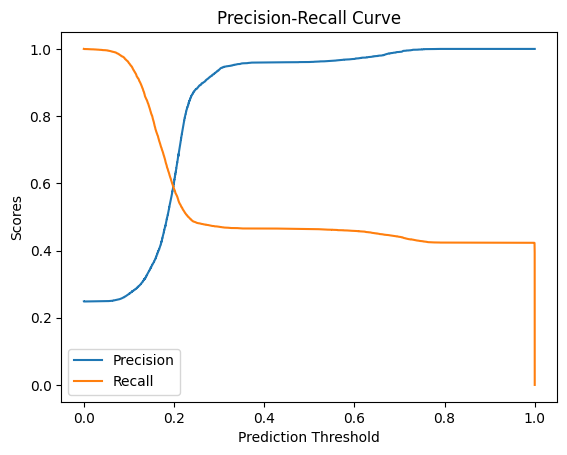

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_test, lr_reg.predict_proba(X_test_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
# plt.grid(True)
plt.show()

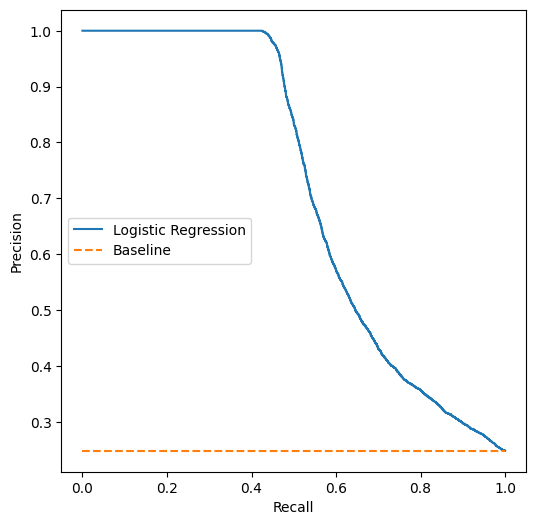

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(r_curve, p_curve, label='Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

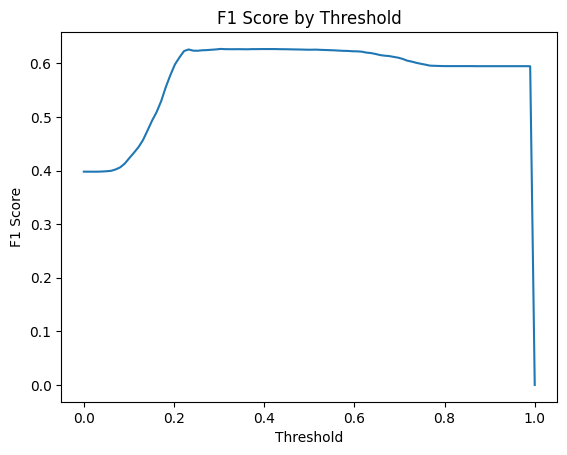

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score

# Assuming lr_reg is your logistic regression model, X_test_std is your standardized test features, and y_test are the true labels
f1 = []
thresholds = np.linspace(0, 1, 100)

for thresh in thresholds:
    y_pred = (lr_reg.predict_proba(X_test_std)[:, 1] > thresh)
    f1.append(f1_score(y_test, y_pred))
    
# Plotting
sns.lineplot(x=thresholds, y=f1)

# Adding title and labels
plt.title('F1 Score by Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

# Display the plot
plt.show()

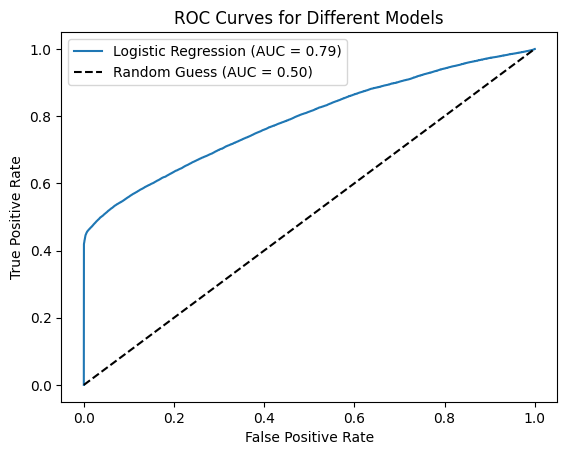

In [27]:
from sklearn.metrics import roc_curve, auc

logreg.fit(X_train_std, y_train)
    
# Predict probabilities for the positive class
y_probs = logreg.predict_proba(X_train_std)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


In [28]:
pd.DataFrame({"TPR": tpr, "FPR": fpr, "Threshold": thresholds}).round(5)

,TPR,FPR,Threshold
0,0.00000,0.00000,inf
1,0.00003,0.00000,1.00000
2,0.33627,0.00000,0.99991
3,0.33627,0.00001,0.99991
4,0.41603,0.00001,0.87127
...,...,...,...
27112,0.99990,0.99991,0.00004
27113,0.99997,0.99991,0.00001
27114,0.99997,0.99994,0.00000
27115,1.00000,0.99994,0.00000
